In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = unit_1x2_uniform_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = unit_net.Net
Generator = uniform_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/unit_1x2_uniform/model-400000


2019-01-22 00:15:26,519:INFO:Restoring parameters from experiments/unit_1x2_uniform/model-400000
2019-01-22 00:15:30,534:INFO:TEST BATCH-0: t = 3.8415, Revenue: 0.244724, Regret: 0.000002, IRP: 0.000000
2019-01-22 00:15:30,545:INFO:TEST BATCH-1: t = 3.8471, Revenue: 0.244615, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,554:INFO:TEST BATCH-2: t = 3.8523, Revenue: 0.244505, Regret: 0.000001, IRP: 0.000000
2019-01-22 00:15:30,562:INFO:TEST BATCH-3: t = 3.8572, Revenue: 0.244395, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,570:INFO:TEST BATCH-4: t = 3.8619, Revenue: 0.244286, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,578:INFO:TEST BATCH-5: t = 3.8665, Revenue: 0.244178, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,586:INFO:TEST BATCH-6: t = 3.8707, Revenue: 0.244074, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,593:INFO:TEST BATCH-7: t = 3.8751, Revenue: 0.243973, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:30,601:INFO:TEST BATCH-8: t = 3.8796, 

2019-01-22 00:15:31,143:INFO:TEST BATCH-76: t = 4.2193, Revenue: 0.246042, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,150:INFO:TEST BATCH-77: t = 4.2246, Revenue: 0.246193, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,158:INFO:TEST BATCH-78: t = 4.2298, Revenue: 0.246358, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,165:INFO:TEST BATCH-79: t = 4.2351, Revenue: 0.246540, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,172:INFO:TEST BATCH-80: t = 4.2402, Revenue: 0.246740, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,180:INFO:TEST BATCH-81: t = 4.2456, Revenue: 0.246963, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,187:INFO:TEST BATCH-82: t = 4.2511, Revenue: 0.247211, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,195:INFO:TEST BATCH-83: t = 4.2564, Revenue: 0.247489, Regret: 0.000002, IRP: 0.000000
2019-01-22 00:15:31,202:INFO:TEST BATCH-84: t = 4.2617, Revenue: 0.247803, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,210:INFO:TEST BAT

2019-01-22 00:15:31,612:INFO:TEST BATCH-153: t = 4.5606, Revenue: 0.579451, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,617:INFO:TEST BATCH-154: t = 4.5647, Revenue: 0.579710, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,622:INFO:TEST BATCH-155: t = 4.5685, Revenue: 0.579956, Regret: 0.000002, IRP: 0.000000
2019-01-22 00:15:31,627:INFO:TEST BATCH-156: t = 4.5719, Revenue: 0.580190, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,632:INFO:TEST BATCH-157: t = 4.5754, Revenue: 0.580415, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,637:INFO:TEST BATCH-158: t = 4.5791, Revenue: 0.580632, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,642:INFO:TEST BATCH-159: t = 4.5825, Revenue: 0.580842, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:15:31,646:INFO:TEST BATCH-160: t = 4.5860, Revenue: 0.581046, Regret: 0.000004, IRP: 0.000000
2019-01-22 00:15:31,651:INFO:TEST BATCH-161: t = 4.5894, Revenue: 0.581245, Regret: 0.000001, IRP: 0.000000
2019-01-22 00:15:31,656:INFO

DEBUG: xsum = 40401.000000


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

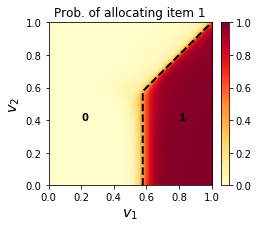

In [6]:
x1 = np.sqrt(3.0)/3.0

points = [(x1, 0), (x1, x1), (1.0, 1.0)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.2, 0.4, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.8, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

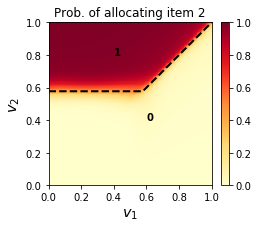

In [7]:
x1 = np.sqrt(3.0)/3.0
points = [(0.0, x1), (x1, x1), (1.0, 1.0)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.6, 0.4, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.8, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)